# 4. Redução da classe dominante

Após ser observado um viés no teste da primeira Rede Neural Convolucional no notebook 3, neste notebook será feita uma redução da classe dominante **No issues**. O objetivo final será melhorar o balanceamento nas classes, removendo 2/3 das amostras desta classe dominante. Assim, é esperado que no final deste notebook qque o espaço amostral de distribuição entre discos intactos e defeituosos fique próximo do equilíbrio (50% / 50%).

## 4.1. Distribuição inicial

In [19]:
# Importaçao de bibliotecas
import json
import random
import matplotlib.pyplot as plt

In [2]:
# Caminhos para os rotulos
caminho_rotulos_treinamento = "/home/giovanni/Projetos/Local/TCC/Datasets/Recortes_Subamostrados/rotulos_regioes_treinamento.json"
caminho_rotulos_teste = "/home/giovanni/Projetos/Local/TCC/Datasets/Recortes_Subamostrados/rotulos_regioes_teste.json"

In [3]:
# Carregamento do arquivo JSON de treinamento e teste
with open(caminho_rotulos_treinamento, 'r') as f1:
    dados_treinamento = json.load(f1)
with open(caminho_rotulos_teste, 'r') as f2:
    dados_teste = json.load(f2)

In [4]:
# Contagem de classes no conjunto de treinamento
contagem_classes_treinamento = {}
for item in dados_treinamento:
    rotulo_classe_treinamento = item['classificacao']
    contagem_classes_treinamento[rotulo_classe_treinamento] = contagem_classes_treinamento.get(rotulo_classe_treinamento, 0) + 1

# Extracao dos rotulos de cada classe e contagens
rotulos_treinamento = list(contagem_classes_treinamento.keys())
rotulos_contagem_treinamento = list(contagem_classes_treinamento.values())

In [5]:
# Contagem de classes no conjunto de teste
contagem_classes_teste = {}
for item in dados_teste:
    rotulo_classe_teste = item['classificacao']
    contagem_classes_teste[rotulo_classe_teste] = contagem_classes_teste.get(rotulo_classe_teste, 0) + 1

# Extracao dos rotulos de cada classe e contagens
rotulos_teste = list(contagem_classes_teste.keys())
rotulos_contagem_teste = list(contagem_classes_teste.values())

In [17]:
# Dicionario - Treinamento
contagem_classes_treinamento

{'No issues': 10783, 'Flashover damage': 2040, 'Broken': 936}

### Distribuição de classes iniciais no conjunto de treinamento

Clase   | Quantidade de amostras 
--------- | ------
No issues | 10783
Flashover damage | 2040
Broken | 936

In [18]:
# Dicionario - Teste
contagem_classes_teste

{'No issues': 2545, 'Broken': 239, 'Flashover damage': 513}

### Distribuição de classes iniciais no conjunto de teste

Clase   | Quantidade de amostras 
--------- | ------
No issues | 2545
Broken | 239
Flashover damage | 513

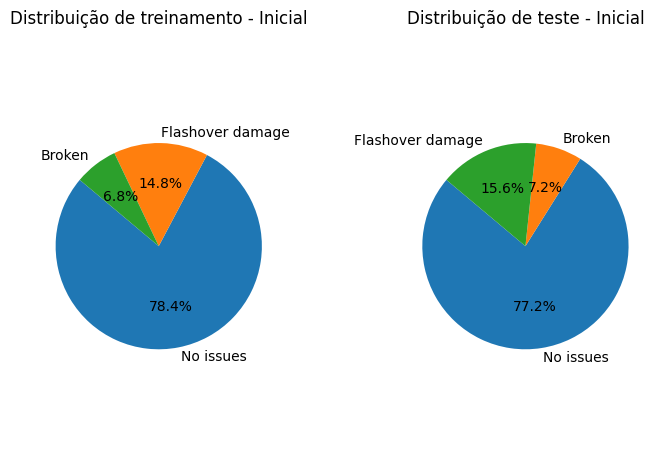

In [38]:
# Plots iniciais

# Plot treinamento
plt.subplot(1, 2, 1)
plt.pie(rotulos_contagem_treinamento, labels=rotulos_treinamento, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribuição de treinamento - Inicial')

# Plot teste
plt.subplot(1, 2, 2)
plt.pie(rotulos_contagem_teste, labels=rotulos_teste, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribuição de teste - Inicial')

# Espaçamento entre graficos
plt.subplots_adjust(wspace=1)  # Ajuste o espaçamento horizontal entre os subplots
plt.tight_layout()  # Garante que os gráficos não se sobreponham
plt.show()

## 4.2. Remoção da classe dominante

In [28]:
# Separacao das classes de treinamento
imagens_no_issues_treinamento = [item for item in dados_treinamento if item['classificacao'] == 'No issues']
imagens_restantes_treinamento = [item for item in dados_treinamento if item['classificacao'] != 'No issues']

# Separacao das classes de teste
imagens_no_issues_teste = [item for item in dados_teste if item['classificacao'] == 'No issues']
imagens_restantes_teste = [item for item in dados_teste if item['classificacao'] != 'No issues']

In [29]:
# Selecao das imagens de no issues que irão permanecer
selecao_no_issues_treinamento = random.sample(imagens_no_issues_treinamento, k=len(imagens_no_issues_treinamento) // 3)
selecao_no_issues_teste = random.sample(imagens_no_issues_teste, k=len(imagens_no_issues_teste) // 3)

In [30]:
# Combinacao das imagens selecionadas
conjunto_final_treinamento = selecao_no_issues_treinamento + imagens_restantes_treinamento
conjunto_final_teste = selecao_no_issues_teste + imagens_restantes_teste

In [31]:
# Salvar as imagens selecionadas em um novo arquivo JSON
with open('/home/giovanni/Projetos/Local/TCC/Datasets/Recortes_Subamostrados/rotulos_balanceados_regioes_treinamento.json', 'w') as f:
    json.dump(conjunto_final_treinamento, f, indent=4)

with open('/home/giovanni/Projetos/Local/TCC/Datasets/Recortes_Subamostrados/rotulos_balanceados_regioes_teste.json', 'w') as f:
    json.dump(conjunto_final_teste, f, indent=4)

## 4.3. Distribuição final

In [32]:
# Carregamento do arquivo JSON de treinamento e teste
with open('/home/giovanni/Projetos/Local/TCC/Datasets/Recortes_Subamostrados/rotulos_balanceados_regioes_treinamento.json', 'r') as f1:
    dados_treinamento_final = json.load(f1)
with open('/home/giovanni/Projetos/Local/TCC/Datasets/Recortes_Subamostrados/rotulos_balanceados_regioes_teste.json', 'r') as f2:
    dados_teste_final = json.load(f2)

In [33]:
# Contagem de classes no conjunto de treinamento balanceado
contagem_classes_treinamento_final = {}
for item in dados_treinamento_final:
    rotulo_classe_treinamento_final = item['classificacao']
    contagem_classes_treinamento_final[rotulo_classe_treinamento_final] = contagem_classes_treinamento_final.get(rotulo_classe_treinamento_final, 0) + 1

# Extracao dos rotulos de cada classe e contagens
rotulos_treinamento_final = list(contagem_classes_treinamento_final.keys())
rotulos_contagem_treinamento_final = list(contagem_classes_treinamento_final.values())

# Contagem de classes no conjunto de teste balanceado balanceado
contagem_classes_teste_final = {}
for item in dados_teste_final:
    rotulo_classe_teste_final = item['classificacao']
    contagem_classes_teste_final[rotulo_classe_teste_final] = contagem_classes_teste_final.get(rotulo_classe_teste_final, 0) + 1

# Extracao dos rotulos de cada classe e contagens
rotulos_teste_final = list(contagem_classes_teste_final.keys())
rotulos_contagem_teste_final = list(contagem_classes_teste_final.values())

In [34]:
# Dicionario - Treinamento apos balanceamento
contagem_classes_treinamento_final

{'No issues': 3594, 'Flashover damage': 2040, 'Broken': 936}

### Distribuição de classes finais no conjunto de treinamento

Classe   | Quantidade de amostras 
--------- | ------
No issues | 3594
Flashover damage | 2040
Broken | 936

In [36]:
# Dicionario - Teste apos balanceamento
contagem_classes_teste_final

{'No issues': 848, 'Broken': 239, 'Flashover damage': 513}

### Distribuição de classes finais no conjunto de teste

Classe   | Quantidade de amostras 
--------- | ------
No issues | 848
Broken | 239
Flashover damage | 513

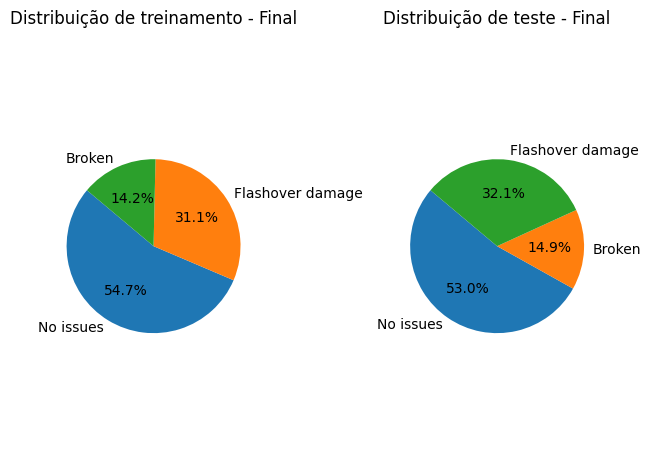

In [39]:
# Plots finais

# Plot treinamento
plt.subplot(1, 2, 1)
plt.pie(rotulos_contagem_treinamento_final, labels=rotulos_treinamento_final, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribuição de treinamento - Final')

# Plot teste
plt.subplot(1, 2, 2)
plt.pie(rotulos_contagem_teste_final, labels=rotulos_teste_final, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribuição de teste - Final')

# Espaçamento entre graficos
plt.subplots_adjust(wspace=1)  # Ajuste o espaçamento horizontal entre os subplots
plt.tight_layout()  # Garante que os gráficos não se sobreponham
plt.show()